In [8]:
import numpy as np

#importing data set and store as numpy.ndarray array
A = np.genfromtxt('training_set_rna1.csv', delimiter=',', dtype=None, encoding=None)
y = np.genfromtxt('training_set_adt1.csv', delimiter=',', dtype=None, encoding=None)
A_test = np.genfromtxt('test_set_rna1.csv', delimiter=',', dtype=None, encoding=None)


In [9]:
# Doing matrix multiplication for solving ax=b
a = np.dot(A,A.T)
b = np.dot(A,y.T)



In [10]:
a.shape

(639, 639)

In [11]:
b.shape

(639, 25)

In [12]:
#using gd_solve for solving the value of x
def gd_solve(a, b, learning_rate = 0.01, max_iter=18000, tol_cutoff=1e-9):
    x = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            #print(b[i])
            z = b[i] / a[i, i]
            x[i] += learning_rate * z
            b -= learning_rate * z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            print('Break')
            break
    return x


In [13]:
#call the function above with learning = 0.0001
x = gd_solve(a, b, learning_rate = 0.0001)

In [14]:
x.shape


(639, 25)

In [15]:
yt= np.dot(x.T,A_test)

In [16]:
yt.shape

(25, 1000)

In [17]:
# save the array to a CSV file
np.savetxt('test18000.csv', yt, delimiter=',')

# NMF

In [18]:
import numpy as np

def gd_solve(a, b, max_iter=100, tol_cutoff=1e-8):
    x = np.zeros(len(b))
    for iter in range(1, max_iter+1):
        tol = 0
        for i in range(len(b)):
            if a[i, i] == 0:
                z = 0
            else:
                z = b[i] / a[i, i]
            
            if x[i] + z < 0:
                z = -x[i]
                x[i]=0
            else:    
                x[i] = x[i] + z
            
            b = b - z * a[:, i]
            tol = tol + abs(z / (x[i] + 1e-15))
        if tol < tol_cutoff:
            break
    return x



In [21]:
import numpy as np

def nmf(A, k, max_iter=10):
    # Initialize W and H
    m, n = A.shape
    W = abs(np.random.rand(m, k))
    H = np.zeros((k, n))
    at = A.T

    
    # Iteratively update W and H
    for i in range(max_iter):
        # Update H
        a = np.dot(W.T, W)
        #print('a',a.shape)
        for j in range(n):
            
            b = np.dot(W.T, A[:, j])
            #print('A[:, j]=',A[:, j].shape)
            #print('b=',b.shape)

            x= gd_solve(a,b)
            #print('x=',x.shape)
            
            #deno = np.sum(x)
            #print('deno=',deno)
            #y = x/deno
            #print('sum = ',np.sum(y))
            H[:,j] = x
            #print('x=',x)
            #print('deno=',deno)
        #print('H',np.sum(H, axis=1))
            #H = H / np.sum(H, axis=1)
        
        # Normalize H
        
        #print(np.sum(H, axis=0))
        #print('H',H.shape)
        
        #print('a',a.shape)
        
        # Update W
        aw = np.dot(H,H.T)
        #print('aw',aw.shape)
        for i in range(0,m):
            #print('i',i)
            bw = np.dot(H, at[:,i])
            #print('bw',bw.shape)
            x1= gd_solve(aw,bw)
            #print('x1',x1.shape)
            
            #deno1 = np.sum(x1)
            #print("W.T[:, i]=",W.T[:, i].shape)
            W.T[:, i] = x1
        #print('w',W)
        #print('w',np.sum(W, axis=1))
 
    return W, H



In [34]:
k = 15
w1,h1 = nmf(A, k)

In [35]:
w1.shape

(639, 15)

In [36]:
h1.shape

(15, 4000)

In [37]:
#calculating A1 which is predicted with NMF
A1=np.dot(w1,h1)

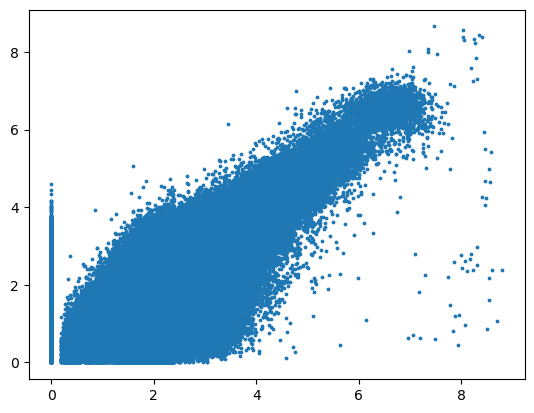

In [38]:
import matplotlib.pyplot as plt


plt.scatter(A, A1,s=3)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error
mean_squared_error(A,A1)

0.691704369756938

In [29]:
import numpy as np

def gd_solve_momentum(a, b, learning_rate=0.0001, max_iter=18000, tol_cutoff=1e-15, momentum=0.9):
    x = np.zeros_like(b)
    v = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            z = b[i] / a[i, i]
            v[i] = momentum * v[i] + (1 - momentum) * z
            x[i] += learning_rate * v[i]
            b -= learning_rate * z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            break
    return x


In [32]:
import numpy as np

def gd_solve_reg(a, b, learning_rate=0.01, max_iter=18000, tol_cutoff=1e-15, alpha=0):
    x = np.zeros_like(b)
    for iter in range(1, max_iter+1):
        tol = np.zeros_like(b)
        for i in range(len(b)):
            z = b[i] / a[i, i]
            if alpha != 0:
                x[i] *= (1 - learning_rate * alpha)
            x[i] += learning_rate * z
            b -= learning_rate * z * a[:, i].reshape((len(b), 1))
            tol += np.abs(z / x[i])
        if np.all(tol < tol_cutoff):
            break
    return x
x =gd_solve_reg(a,b,alpha=0.01)

In [40]:
x.shape

(639, 25)

In [41]:
yt= np.dot(x.T,A_test)

In [42]:
yt.shape

(25, 1000)

In [43]:
# save the array to a CSV file
np.savetxt('reg18000.csv', yt, delimiter=',')